# Tutorial
This Jupyter notebook is meant to serve as a guide for demonstrating Elastic/Plastic (Isotropic/Kinematic) deformation. To use this notebook, please run each cell individually, and you will encounter the examples and solutions as you keep going through. If you have any questions on how to get the code up and running, please refer to the README.md 

It is essential that the first python block in this notebook is ran first, the one that imports numpy and newtonian, otherwise the rest of the cells will have difficulty running.

In [1]:
'''
This code block imports the essential/main ElastoPlastic module, matplotlip and numpy.
'''
import numpy as np
import matplotlib.pyplot as plt
from ElastoPlastic import ElastoPlasticModel


## Explaining Elasto-Plasticity

Elasto-plasticity describes how materials behave when subjected to loads beyond their elastic limit. Initially, a material deforms elastically (returns to its original shape when unloaded). Once stress exceeds the yield stress, plastic deformation occurs, meaning some deformation remains even after unloading.

**class ElastoPlasticModel**

The passed parameters have the following purpose:\

- **`E` (Elastic modulus)**  
  - Represents the stiffness of the material.  
  - A higher value means the material resists deformation more.  

- **`Y_initial` (Initial yield stress)**  
  - The stress level at which plastic deformation begins.  
  - Below this value, the material behaves elastically.  

- **`H_iso` (Isotropic hardening modulus)**  
  - Controls how much the yield stress increases with plastic strain.  
  - A higher value means the material strengthens more as it undergoes plastic deformation.  

- **`H_kin` (Kinematic hardening modulus)**  
  - Determines how much the yield surface shifts with plastic strain.  
  - Important for cyclic loading, where it models the Bauschinger effect (easier yielding in reverse direction).  


### Example 1

This first example is a simple test of elasticity. We apply small strain increments to the material while keeping the yield stress high enough that plastic deformation never occurs. If the model is working correctly, the stress should increase linearly with strain, following Hooke’s Law.

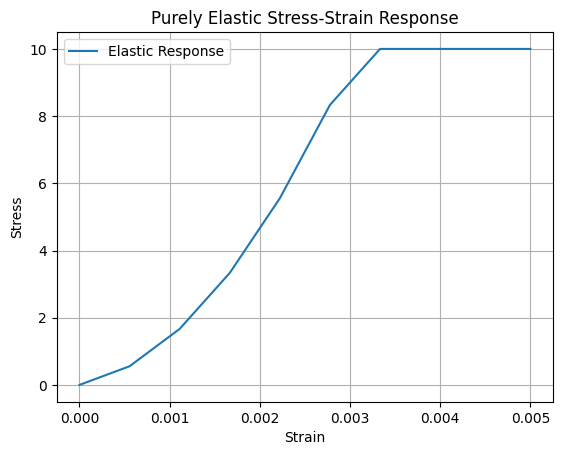

In [2]:
'''
This example applies small strain increments to test if the material follows Hooke’s Law (Elastic Region).
'''

# Initialize model with no hardening (purely elastic)
model = ElastoPlasticModel(E=1000, Y_initial=10, H_iso=0, H_kin=0)

# Apply small strain increments (elastic range)
strain_increments = np.linspace(0, 0.005, 10)
stress_values = [model.update_step(eps) for eps in strain_increments]

# Plot results
plt.plot(strain_increments, stress_values, label="Elastic Response")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Purely Elastic Stress-Strain Response")
plt.legend()
plt.grid()
plt.show()

### Example 2

Here, we push the material past its yield limit by applying a large strain increment. Initially, the stress should increase linearly (elastic response), but once the yield stress is reached, the material starts deforming plastically. After this point, stress no longer increases as steeply, indicating permanent deformation. 

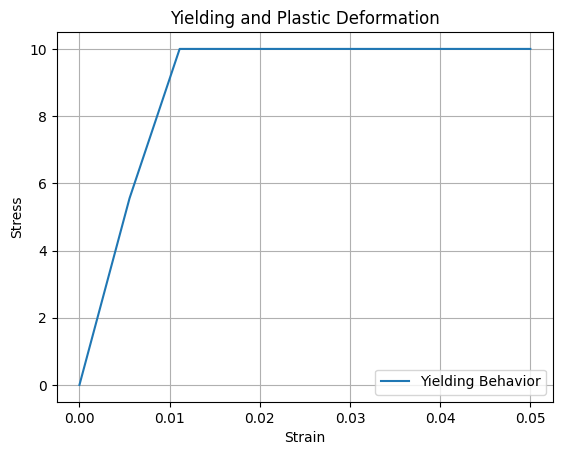

In [3]:
# Initialize model with no hardening
model = ElastoPlasticModel(E=1000, Y_initial=10, H_iso=0, H_kin=0)

# Apply large strain increment to induce plasticity
strain_increments = np.linspace(0, 0.05, 10)
stress_values = [model.update_step(eps) for eps in strain_increments]

# Plot results
plt.plot(strain_increments, stress_values, label="Yielding Behavior")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Yielding and Plastic Deformation")
plt.legend()
plt.grid()
plt.show()


### Example 3 - Isotropic

This example introduces isotropic hardening, meaning the yield stress increases as plastic deformation progresses. We apply a series of strain increments, causing plastic deformation. As the material undergoes plastic strain, the yield surface expands, making it harder to yield in future loading steps. 

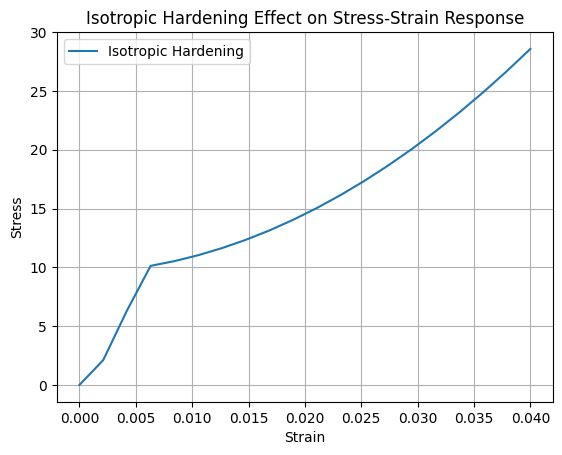

In [4]:
# Initialize model with isotropic hardening
model = ElastoPlasticModel(E=1000, Y_initial=10, H_iso=50, H_kin=0)

# Apply strain increments to induce plastic deformation
strain_increments = np.linspace(0, 0.04, 20)
stress_values = [model.update_step(eps) for eps in strain_increments]

# Plot results
plt.plot(strain_increments, stress_values, label="Isotropic Hardening")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Isotropic Hardening Effect on Stress-Strain Response")
plt.legend()
plt.grid()
plt.show()


### Example 4 - Kinematic

Kinematic hardening models the shift of the yield surface rather than its expansion. We apply strain in one direction, causing plastic deformation, and then reverse the strain direction. 

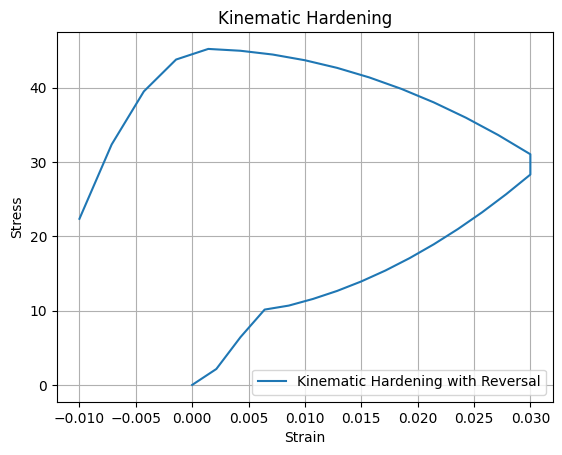

In [5]:
# Initialize model with kinematic hardening
model = ElastoPlasticModel(E=1000, Y_initial=10, H_iso=0, H_kin=50)

# Apply forward strain increments (plastic deformation)
strain_increments = np.linspace(0, 0.03, 15)
stress_values = [model.update_step(eps) for eps in strain_increments]

# Apply reverse strain increments (reversal to test kinematic hardening)
reverse_strain = np.linspace(0.03, -0.01, 15)
reverse_stress_values = [model.update_step(eps) for eps in reverse_strain]

# Combine data
total_strain = np.concatenate((strain_increments, reverse_strain))
total_stress = np.concatenate((stress_values, reverse_stress_values))

# Plot results
plt.plot(total_strain, total_stress, label="Kinematic Hardening with Reversal")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Kinematic Hardening")
plt.legend()
plt.grid()
plt.show()


### Example 5 - Both

Finally, most materials don’t experience just one type of hardening. This example combines both isotropic and kinematic hardening to simulate a more realistic material response. 

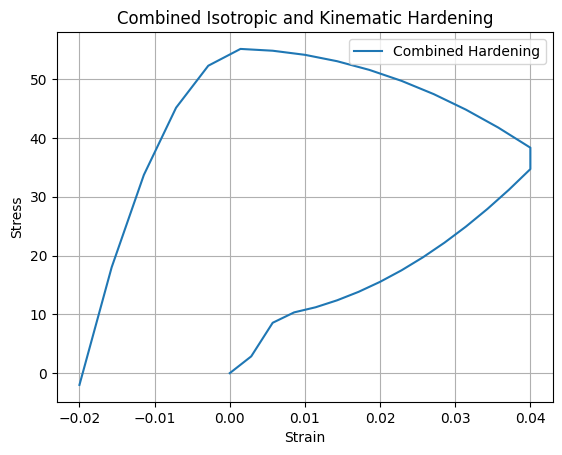

In [6]:
# Initialize model with both isotropic and kinematic hardening
model = ElastoPlasticModel(E=1000, Y_initial=10, H_iso=30, H_kin=50)

# Apply cyclic loading
strain_increments = np.linspace(0, 0.04, 15)
stress_values = [model.update_step(eps) for eps in strain_increments]

reverse_strain = np.linspace(0.04, -0.02, 15)
reverse_stress_values = [model.update_step(eps) for eps in reverse_strain]

# Combine data
total_strain = np.concatenate((strain_increments, reverse_strain))
total_stress = np.concatenate((stress_values, reverse_stress_values))

# Plot results
plt.plot(total_strain, total_stress, label="Combined Hardening")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Combined Isotropic and Kinematic Hardening")
plt.legend()
plt.grid()
plt.show()
